In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

import re
from tqdm import tnrange, tqdm_notebook, tqdm


In [2]:
! pip install vaderSentiment

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
pip install cbpro

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cbpro

In [6]:
pip install --upgrade pyopenssl --user

Note: you may need to restart the kernel to use updated packages.


In [7]:
raw = pd.read_csv('Bitcoin_tweets_dataset_2.csv', lineterminator='\n')
raw.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ChefSam,Sunshine State,Culinarian | Hot Sauce Artisan | Kombucha Brew...,2011-03-23 03:50:13,4680,2643,6232,False,2023-03-01 23:59:59,Which #bitcoin books should I think about read...,['bitcoin'],Twitter for iPhone,False
1,Roy⚡️,NaN,Truth-seeking pleb 📚 • Science 🧪 • Nature 🌱☀️ ...,2022-01-30 17:41:41,770,1145,9166,False,2023-03-01 23:59:47,"@ThankGodForBTC I appreciate the message, but ...",['Bitcoin'],Twitter for iPhone,False
2,Ethereum Yoda,NaN,UP or DOWN...\n.\n.\n.\n.\nPrice matters NOT.,2022-07-24 04:50:18,576,1,0,False,2023-03-01 23:59:42,#Ethereum price update: \n\n#ETH $1664.02 USD\...,"['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin...",Twitter Web App,False
3,Viction,"Paris, France",https://t.co/8M3rgdjwEe\n\n#bitcoin #blockchai...,2010-03-26 10:15:26,236,1829,2195,False,2023-03-01 23:59:36,CoinDashboard v3.0 is here\nAvailable on ios a...,['Bitcoin'],Twitter for Android,False
4,Rosie,London,"The flower language of jasmine is loyalty, res...",2013-02-16 09:57:56,12731,46,134,False,2023-03-01 23:59:32,#Bitcoin Short Term Fractal (4H)💥\n\nIn lower ...,"['Bitcoin', 'BTC']",Twitter Web App,False


In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169820 entries, 0 to 169819
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         169819 non-null  object
 1   user_location     84163 non-null   object
 2   user_description  158756 non-null  object
 3   user_created      169820 non-null  object
 4   user_followers    169820 non-null  int64 
 5   user_friends      169820 non-null  int64 
 6   user_favourites   169820 non-null  int64 
 7   user_verified     169820 non-null  bool  
 8   date              169820 non-null  object
 9   text              169820 non-null  object
 10  hashtags          169820 non-null  object
 11  source            169820 non-null  object
 12  is_retweet        169820 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 14.6+ MB


# Cleaning 
### Certain columns ( user_location, user_description, user_created, user_friends, user_favourites, source) would not affect the content of the tweet as they just represent the user's information, and thus can be removed as they don't provide insight towards the tweet


In [9]:
clean = raw.copy()
clean.drop('user_location', inplace = True, axis = 1)
clean.drop('user_description', inplace = True, axis = 1)
clean.drop('user_created', inplace = True, axis = 1)
clean.drop('user_friends', inplace = True, axis = 1)
clean.drop('user_favourites', inplace = True, axis = 1)
clean.drop('source', inplace = True, axis = 1)
clean.head()

,user_name,user_followers,user_verified,date,text,hashtags,is_retweet
0,ChefSam,4680,False,2023-03-01 23:59:59,Which #bitcoin books should I think about read...,['bitcoin'],False
1,Roy⚡️,770,False,2023-03-01 23:59:47,"@ThankGodForBTC I appreciate the message, but ...",['Bitcoin'],False
2,Ethereum Yoda,576,False,2023-03-01 23:59:42,#Ethereum price update: \n\n#ETH $1664.02 USD\...,"['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin...",False
3,Viction,236,False,2023-03-01 23:59:36,CoinDashboard v3.0 is here\nAvailable on ios a...,['Bitcoin'],False
4,Rosie,12731,False,2023-03-01 23:59:32,#Bitcoin Short Term Fractal (4H)💥\n\nIn lower ...,"['Bitcoin', 'BTC']",False


In [10]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169820 entries, 0 to 169819
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_name       169819 non-null  object
 1   user_followers  169820 non-null  int64 
 2   user_verified   169820 non-null  bool  
 3   date            169820 non-null  object
 4   text            169820 non-null  object
 5   hashtags        169820 non-null  object
 6   is_retweet      169820 non-null  bool  
dtypes: bool(2), int64(1), object(4)
memory usage: 6.8+ MB


### user_name is not supposed to have null values, could be the result of an error. Fill in with a placeholder

In [11]:
clean['user_name'].fillna(value = "UNKNOWN_USER_placeholder", inplace = True)
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169820 entries, 0 to 169819
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_name       169820 non-null  object
 1   user_followers  169820 non-null  int64 
 2   user_verified   169820 non-null  bool  
 3   date            169820 non-null  object
 4   text            169820 non-null  object
 5   hashtags        169820 non-null  object
 6   is_retweet      169820 non-null  bool  
dtypes: bool(2), int64(1), object(4)
memory usage: 6.8+ MB


## The dataset is too big, shrink it for easier analysis

In [12]:
tweetdata = clean.sample(frac=0.01, replace=False, random_state=1)
tweetdata.reset_index(inplace=True)

In [13]:
tweetdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1698 non-null   int64 
 1   user_name       1698 non-null   object
 2   user_followers  1698 non-null   int64 
 3   user_verified   1698 non-null   bool  
 4   date            1698 non-null   object
 5   text            1698 non-null   object
 6   hashtags        1698 non-null   object
 7   is_retweet      1698 non-null   bool  
dtypes: bool(2), int64(2), object(4)
memory usage: 83.0+ KB


## We will be using the VADER Package to provide further insight into the data
### VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. As such, it evaluates the text, and provide a score between -1.0(negative) and 1.0(positive). However, the text has to be modifed to remove certain characters that are not compatible with VADER.

In [14]:
for i,s in enumerate(tqdm(tweetdata['text'],position=0, leave=True)):
    text = str(tweetdata.loc[i, 'text'])
    text = text.replace("#", "")
    text = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text, flags=re.MULTILINE)
    text = re.sub('@\\w+ *', '', text, flags=re.MULTILINE)
    tweetdata.loc[i, 'text'] = text

100%|███████████████████████████████████████████████████████████████████████████| 1698/1698 [00:00<00:00, 12742.92it/s]


In [15]:
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm(tweetdata['text'],position=0, leave=True)):
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])
tweetdata["sentiment_value"] = compound

100%|████████████████████████████████████████████████████████████████████████████| 1698/1698 [00:00<00:00, 8960.59it/s]


In [16]:
tweetdata.head()

,index,user_name,user_followers,user_verified,date,text,hashtags,is_retweet,sentiment_value
0,158073,CryptoScient 🪙,1956,False,2023-03-02 10:11:31,"$UNI - $USDT, I think UNI has the strongest an...","['Altcoins', 'Crypto', 'Bitcoin', 'Uniswap', '...",False,0.4404
1,164759,Daily News,135,False,2023-03-02 01:02:25,"Koii Labs, Idexos launch middleware bridge aim...","['BitcoinHodlDay', 'bitcoinHunter', 'bitcoinpr...",False,0.0000
2,113423,kovichni,424,False,2023-03-04 11:57:34,It's 2023 and Alts are still partnering with l...,"['Alts', 'Bitcoin']",False,0.0000
3,143947,DookieLove 1618 ✪,679,False,2023-03-03 00:29:29,Saylords : The first of the Bitlords\nInscript...,"['BitcoinNFTs', 'Ordinals', 'OrdinalsNFT', 'Or...",False,0.0000
4,91282,Timmy Sats,517,False,2023-02-25 22:02:24,I got some reading to do…\nBitcoin /1hlhKxpVVj,['Bitcoin'],False,0.0000


## Our plan to measure how the Bitcoin price fluctuates according to tweets requires us to compare against Bitcoin prices over time, thus we need to sort the dataset by date

In [17]:
tweetseries = tweetdata.sort_values(by = 'date')
tweetseries.reset_index(inplace = True)

In [18]:
tweetseries.drop('level_0', inplace = True, axis = 1)
tweetseries.drop('index', inplace = True, axis = 1)

In [19]:
tweetseries.head()

,user_name,user_followers,user_verified,date,text,hashtags,is_retweet,sentiment_value
0,White Vador ➿,125,False,2023-02-25 20:50:02,Janet Yellen calls for 'strong regulatory fram...,"['Bitcoin', 'BTC', 'Ethereum', 'eth', 'Crypto'...",False,0.5106
1,🤖 EconSnapped,82,False,2023-02-25 20:52:09,"💰 SP500 3,970.04 📈 0.18%\n🚜 DJIA 32,816....","['SP500', 'DJIA', 'Gold', 'CrudeOil', 'Bitcoin']",False,0.4767
2,— ⬩ ᴅ ᴇ ᴄ ᴇ ɴ ᴛ ʀ ᴀ ʟ ɪ s ᴇ ⬩ —,697,False,2023-02-25 20:57:36,$BTC BTC Bitcoin 15min\n\nLonged this\n\nTrend...,"['BTC', 'Bitcoin']",False,-0.6080
3,CryptoSpace,333,False,2023-02-25 20:59:01,Good night crypto community! Heres hoping you ...,"['cryptocurrency', 'profits', 'Blockchain', 'C...",False,0.9440
4,CRYPTO_WORLD🌍,1271,False,2023-02-25 21:07:28,Why market is running from $BTC 💔 $BTC F*king ...,"['TrendingNow', 'short', 'BTC', 'Bitcoin', 'Bi...",False,0.5574


In [20]:
tweetseries.tail()

,user_name,user_followers,user_verified,date,text,hashtags,is_retweet,sentiment_value
1693,DigitalMoneyBox,238,False,2023-03-05 23:30:02,"EOS, STX, IMX and MKR show bullish signs as Bi...","['CryptocurrencyNews', 'cryptocurrency', 'Cryp...",False,0.0000
1694,L3X - 🅰🅻🅴🆁🆃 v5.3,182,False,2023-03-05 23:32:28,Profit $1000/Day with wondrous ⚡️ $BUSD 🎯 ...,"['SPX', 'TradingSignal', 'BTC', 'BusinessNews'...",False,0.7003
1695,날마다 좋은 날,78,False,2023-03-05 23:38:21,Powering a rural Kenya village and securing th...,"['Bitcoin', 'Crypto', 'Bitcoin', 'dooridoori',...",False,0.0772
1696,Bitcoin Bot🤖,1957,False,2023-03-05 23:55:45,Current Bitcoin Price is $22432 BTC Crypto,"['Bitcoin', 'BTC', 'Crypto']",False,0.0000
1697,1HoDLCLUB⚡∞/21M⚡,169,False,2023-03-05 23:57:26,Don't miss it ! 🐸⚡️ Bitcoin cryptoart and pepe...,"['Bitcoin', 'cryptoart', 'pepe']",False,0.1867


In [21]:
tweetseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_name        1698 non-null   object 
 1   user_followers   1698 non-null   int64  
 2   user_verified    1698 non-null   bool   
 3   date             1698 non-null   object 
 4   text             1698 non-null   object 
 5   hashtags         1698 non-null   object 
 6   is_retweet       1698 non-null   bool   
 7   sentiment_value  1698 non-null   float64
dtypes: bool(2), float64(1), int64(1), object(4)
memory usage: 83.0+ KB


## We believe that each tweet on Bitcoin has a certain amount of influence on it. This influence is related to the reach of the tweet, and therefore would have strong correlation to the number of followers the author has. Ideally there would be other factors that would influence this: Number of shares and likes would also have an effect, however these are not provided in the dataset. user_verified would have also been a good factor,as a measure of reputation, but since it is now tied to a subscription, it is no longer accurate to say that verified accounts are reputable. 

In [22]:
tweets = tweetseries.copy()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
tweets['user_followers'].describe()

count      1698.000
mean      14086.536
std      154155.139
min           0.000
25%         136.000
50%         513.000
75%        1980.750
max     3061702.000
Name: user_followers, dtype: float64

In [23]:
# compute the quartile cutoffs for the original_variable column
q1 = tweets['user_followers'].quantile(0.25)
q2 = tweets['user_followers'].quantile(0.50)
q3 = tweets['user_followers'].quantile(0.75)

# define a function to map percentile ranks to levels
def assign_level(x):
    if x <= q1:
        return 1
    elif x <= q2:
        return 2
    elif x <= q3:
        return 3
    elif x > q3 + 1.5 * (q3 - q1):  # check for outliers
        return 10  # assign rank 10 to outliers
    else:
        return 4

# create a new column that assigns a level based on the percentile rank of the original_variable column
tweets['level'] = tweets['user_followers'].apply(assign_level)

In [24]:
tweets.head()

,user_name,user_followers,user_verified,date,text,hashtags,is_retweet,sentiment_value,level
0,White Vador ➿,125,False,2023-02-25 20:50:02,Janet Yellen calls for 'strong regulatory fram...,"['Bitcoin', 'BTC', 'Ethereum', 'eth', 'Crypto'...",False,0.511,1
1,🤖 EconSnapped,82,False,2023-02-25 20:52:09,"💰 SP500 3,970.04 📈 0.18%\n🚜 DJIA 32,816....","['SP500', 'DJIA', 'Gold', 'CrudeOil', 'Bitcoin']",False,0.477,1
2,— ⬩ ᴅ ᴇ ᴄ ᴇ ɴ ᴛ ʀ ᴀ ʟ ɪ s ᴇ ⬩ —,697,False,2023-02-25 20:57:36,$BTC BTC Bitcoin 15min\n\nLonged this\n\nTrend...,"['BTC', 'Bitcoin']",False,-0.608,3
3,CryptoSpace,333,False,2023-02-25 20:59:01,Good night crypto community! Heres hoping you ...,"['cryptocurrency', 'profits', 'Blockchain', 'C...",False,0.944,2
4,CRYPTO_WORLD🌍,1271,False,2023-02-25 21:07:28,Why market is running from $BTC 💔 $BTC F*king ...,"['TrendingNow', 'short', 'BTC', 'Bitcoin', 'Bi...",False,0.557,3


In [25]:
influence = []
for i, s in tqdm(tweets.iterrows(), total=tweets.shape[0],position=0, leave=True):
    try:
        influence.append(s["sentiment_value"] * ((int(s["level"]))))
    except:
        influence.append(np.nan)
tweets["influence"] = influence

100%|███████████████████████████████████████████████████████████████████████████| 1698/1698 [00:00<00:00, 25400.53it/s]


In [26]:
tweets.head()

,user_name,user_followers,user_verified,date,text,hashtags,is_retweet,sentiment_value,level,influence
0,White Vador ➿,125,False,2023-02-25 20:50:02,Janet Yellen calls for 'strong regulatory fram...,"['Bitcoin', 'BTC', 'Ethereum', 'eth', 'Crypto'...",False,0.511,1,0.511
1,🤖 EconSnapped,82,False,2023-02-25 20:52:09,"💰 SP500 3,970.04 📈 0.18%\n🚜 DJIA 32,816....","['SP500', 'DJIA', 'Gold', 'CrudeOil', 'Bitcoin']",False,0.477,1,0.477
2,— ⬩ ᴅ ᴇ ᴄ ᴇ ɴ ᴛ ʀ ᴀ ʟ ɪ s ᴇ ⬩ —,697,False,2023-02-25 20:57:36,$BTC BTC Bitcoin 15min\n\nLonged this\n\nTrend...,"['BTC', 'Bitcoin']",False,-0.608,3,-1.824
3,CryptoSpace,333,False,2023-02-25 20:59:01,Good night crypto community! Heres hoping you ...,"['cryptocurrency', 'profits', 'Blockchain', 'C...",False,0.944,2,1.888
4,CRYPTO_WORLD🌍,1271,False,2023-02-25 21:07:28,Why market is running from $BTC 💔 $BTC F*king ...,"['TrendingNow', 'short', 'BTC', 'Bitcoin', 'Bi...",False,0.557,3,1.672


In [27]:
# Set the base value for the first row
base_value = 0.511
tweets.loc[0, 'cumulative_influence'] = tweets.loc[0, 'influence']

# Calculate the cumulative sum for the remaining rows
tweets.loc[1:, 'cumulative_influence'] = tweets.loc[1:, 'influence'].cumsum() + base_value

In [28]:
tweets.head()

,user_name,user_followers,user_verified,date,text,hashtags,is_retweet,sentiment_value,level,influence,cumulative_influence
0,White Vador ➿,125,False,2023-02-25 20:50:02,Janet Yellen calls for 'strong regulatory fram...,"['Bitcoin', 'BTC', 'Ethereum', 'eth', 'Crypto'...",False,0.511,1,0.511,0.511
1,🤖 EconSnapped,82,False,2023-02-25 20:52:09,"💰 SP500 3,970.04 📈 0.18%\n🚜 DJIA 32,816....","['SP500', 'DJIA', 'Gold', 'CrudeOil', 'Bitcoin']",False,0.477,1,0.477,0.988
2,— ⬩ ᴅ ᴇ ᴄ ᴇ ɴ ᴛ ʀ ᴀ ʟ ɪ s ᴇ ⬩ —,697,False,2023-02-25 20:57:36,$BTC BTC Bitcoin 15min\n\nLonged this\n\nTrend...,"['BTC', 'Bitcoin']",False,-0.608,3,-1.824,-0.836
3,CryptoSpace,333,False,2023-02-25 20:59:01,Good night crypto community! Heres hoping you ...,"['cryptocurrency', 'profits', 'Blockchain', 'C...",False,0.944,2,1.888,1.052
4,CRYPTO_WORLD🌍,1271,False,2023-02-25 21:07:28,Why market is running from $BTC 💔 $BTC F*king ...,"['TrendingNow', 'short', 'BTC', 'Bitcoin', 'Bi...",False,0.557,3,1.672,2.724


In [29]:
# connect to the Coinbase Pro API
try:
    public_client = cbpro.PublicClient()
except Exception as e:
    print("Error connecting to Coinbase Pro API:", e)

In [30]:
# round the timestamp to the nearest minute
tweets['date'] = pd.to_datetime(tweets['date']).dt.round('min')

# initialize the progress bar
progress_bar = tqdm(total=len(tweets))

# loop through each row in the dataset
for index, row in tweets.iterrows():
    # get the timestamp from the date column
    timestamp = pd.Timestamp(row['date'])
    
    # convert the timestamp to ISO format
    iso_time = timestamp.isoformat()
    
    # get the bitcoin price data for the timestamp
    try:
        price_data = public_client.get_product_historic_rates('BTC-USD', start=iso_time, end=iso_time)
    except Exception as e:
        print("Error retrieving price data:", e)
        continue
    
    # extract the price from the price data
    if len(price_data) > 0:
        price = price_data[0][4]
    else:
        price = None
    
    # append the price to the dataset
    tweets.at[index, 'bitcoin_price'] = price
    
    # update the progress bar
    progress_bar.update(1)

# close the progress bar
progress_bar.close()

100%|██████████████████████████████████████████████████████████████████████████████| 1698/1698 [08:29<00:00,  3.33it/s]


In [31]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_name             1698 non-null   object        
 1   user_followers        1698 non-null   int64         
 2   user_verified         1698 non-null   bool          
 3   date                  1698 non-null   datetime64[ns]
 4   text                  1698 non-null   object        
 5   hashtags              1698 non-null   object        
 6   is_retweet            1698 non-null   bool          
 7   sentiment_value       1698 non-null   float64       
 8   level                 1698 non-null   int64         
 9   influence             1698 non-null   float64       
 10  cumulative_influence  1698 non-null   float64       
 11  bitcoin_price         1636 non-null   float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage:

In [32]:
# interpolate missing values
tweets['bitcoin_price'] = tweets['bitcoin_price'].interpolate()

In [33]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_name             1698 non-null   object        
 1   user_followers        1698 non-null   int64         
 2   user_verified         1698 non-null   bool          
 3   date                  1698 non-null   datetime64[ns]
 4   text                  1698 non-null   object        
 5   hashtags              1698 non-null   object        
 6   is_retweet            1698 non-null   bool          
 7   sentiment_value       1698 non-null   float64       
 8   level                 1698 non-null   int64         
 9   influence             1698 non-null   float64       
 10  cumulative_influence  1698 non-null   float64       
 11  bitcoin_price         1698 non-null   float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage:

In [34]:
tweets.head()

,user_name,user_followers,user_verified,date,text,hashtags,is_retweet,sentiment_value,level,influence,cumulative_influence,bitcoin_price
0,White Vador ➿,125,False,2023-02-25 20:50:00,Janet Yellen calls for 'strong regulatory fram...,"['Bitcoin', 'BTC', 'Ethereum', 'eth', 'Crypto'...",False,0.511,1,0.511,0.511,22884.430
1,🤖 EconSnapped,82,False,2023-02-25 20:52:00,"💰 SP500 3,970.04 📈 0.18%\n🚜 DJIA 32,816....","['SP500', 'DJIA', 'Gold', 'CrudeOil', 'Bitcoin']",False,0.477,1,0.477,0.988,22909.750
2,— ⬩ ᴅ ᴇ ᴄ ᴇ ɴ ᴛ ʀ ᴀ ʟ ɪ s ᴇ ⬩ —,697,False,2023-02-25 20:58:00,$BTC BTC Bitcoin 15min\n\nLonged this\n\nTrend...,"['BTC', 'Bitcoin']",False,-0.608,3,-1.824,-0.836,22892.020
3,CryptoSpace,333,False,2023-02-25 20:59:00,Good night crypto community! Heres hoping you ...,"['cryptocurrency', 'profits', 'Blockchain', 'C...",False,0.944,2,1.888,1.052,22926.420
4,CRYPTO_WORLD🌍,1271,False,2023-02-25 21:07:00,Why market is running from $BTC 💔 $BTC F*king ...,"['TrendingNow', 'short', 'BTC', 'Bitcoin', 'Bi...",False,0.557,3,1.672,2.724,22923.910


In [35]:
tweets.tail()

,user_name,user_followers,user_verified,date,text,hashtags,is_retweet,sentiment_value,level,influence,cumulative_influence,bitcoin_price
1693,DigitalMoneyBox,238,False,2023-03-05 23:30:00,"EOS, STX, IMX and MKR show bullish signs as Bi...","['CryptocurrencyNews', 'cryptocurrency', 'Cryp...",False,0.000,2,0.000,799.359,22406.320
1694,L3X - 🅰🅻🅴🆁🆃 v5.3,182,False,2023-03-05 23:32:00,Profit $1000/Day with wondrous ⚡️ $BUSD 🎯 ...,"['SPX', 'TradingSignal', 'BTC', 'BusinessNews'...",False,0.700,2,1.401,800.760,22440.980
1695,날마다 좋은 날,78,False,2023-03-05 23:38:00,Powering a rural Kenya village and securing th...,"['Bitcoin', 'Crypto', 'Bitcoin', 'dooridoori',...",False,0.077,1,0.077,800.837,22429.960
1696,Bitcoin Bot🤖,1957,False,2023-03-05 23:56:00,Current Bitcoin Price is $22432 BTC Crypto,"['Bitcoin', 'BTC', 'Crypto']",False,0.000,3,0.000,800.837,22430.170
1697,1HoDLCLUB⚡∞/21M⚡,169,False,2023-03-05 23:57:00,Don't miss it ! 🐸⚡️ Bitcoin cryptoart and pepe...,"['Bitcoin', 'cryptoart', 'pepe']",False,0.187,2,0.373,801.210,22429.440


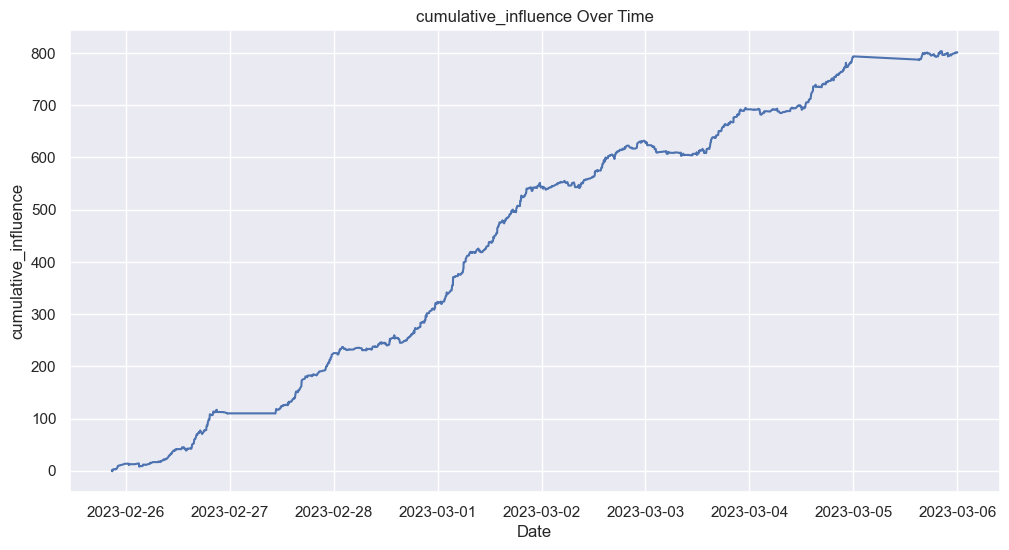

In [36]:
# Set the figure size for the plot using Seaborn
sb.set(rc={'figure.figsize':(12, 6)})

# Create a line graph 
sb.lineplot(x='date', y='cumulative_influence', data=tweets)

plt.title('cumulative_influence Over Time')
plt.xlabel('Date')
plt.ylabel('cumulative_influence')

# Display the line graph
plt.show()

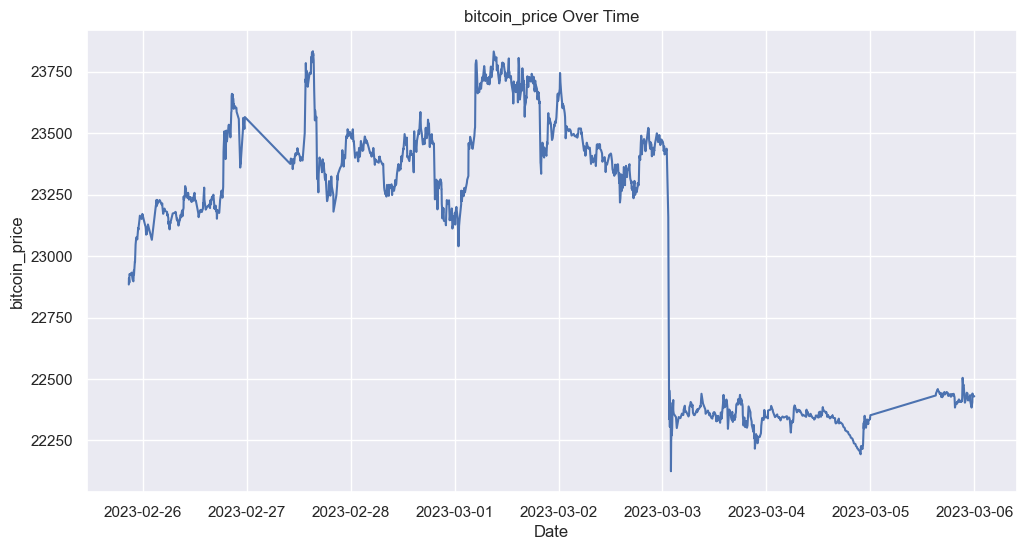

In [37]:
# Set the figure size for the plot using Seaborn
sb.set(rc={'figure.figsize':(12, 6)})

# Create a line graph 
sb.lineplot(x='date', y='bitcoin_price', data=tweets)

plt.title('bitcoin_price Over Time')
plt.xlabel('Date')
plt.ylabel('bitcoin_price')

# Display the line graph
plt.show()

# There was a sudden drop in bitcoin_price on 2023-03-03
## This could have the result of outside factors: Most likely dude to the fall of Silvergate Bank, which was a cryptocurrency friendly bank
### This sudden change would affect the model, and as such we should restrict the dataset to before the drop.

In [38]:
# Drop the rows after 2023-03-03
tweets = tweets[tweets['date'] <= '2023-03-03']

In [39]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 0 to 1139
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_name             1140 non-null   object        
 1   user_followers        1140 non-null   int64         
 2   user_verified         1140 non-null   bool          
 3   date                  1140 non-null   datetime64[ns]
 4   text                  1140 non-null   object        
 5   hashtags              1140 non-null   object        
 6   is_retweet            1140 non-null   bool          
 7   sentiment_value       1140 non-null   float64       
 8   level                 1140 non-null   int64         
 9   influence             1140 non-null   float64       
 10  cumulative_influence  1140 non-null   float64       
 11  bitcoin_price         1140 non-null   float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage:

In [41]:
tweets.to_csv('tweetsfinal.csv', index=False) # for easy access

<AxesSubplot:>

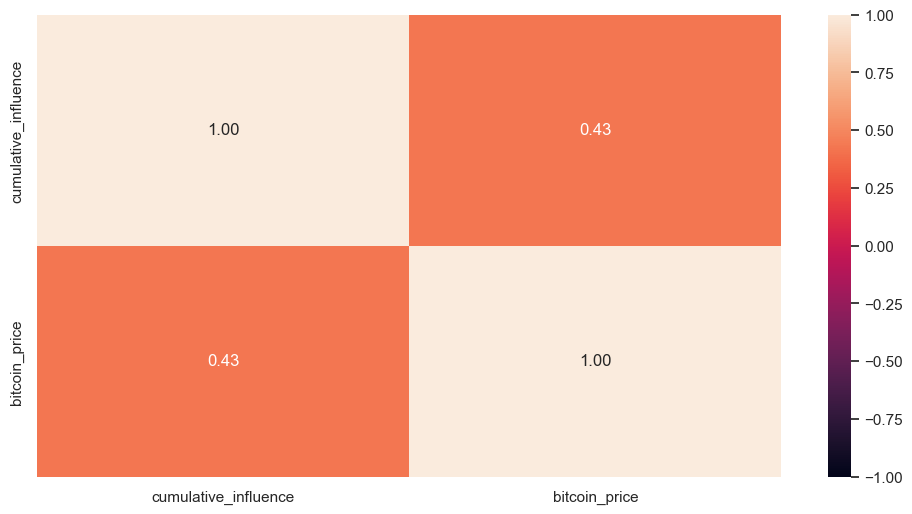

In [42]:
cum_inf =pd.DataFrame(tweets['cumulative_influence'])
price = pd.DataFrame(tweets['bitcoin_price'])
heatmapdf = pd.concat([cum_inf, price], axis = 1).reindex(cum_inf.index)
sb.heatmap(heatmapdf.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Intercept of Regression 	: b =  [23289.36574323]
Coefficients of Regression 	: a =  [[0.40668437]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.17663382055075671
Mean Squared Error (MSE) 	: 31229.37251174145

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.19007072866928798
Mean Squared Error (MSE) 	: 32170.384085520174



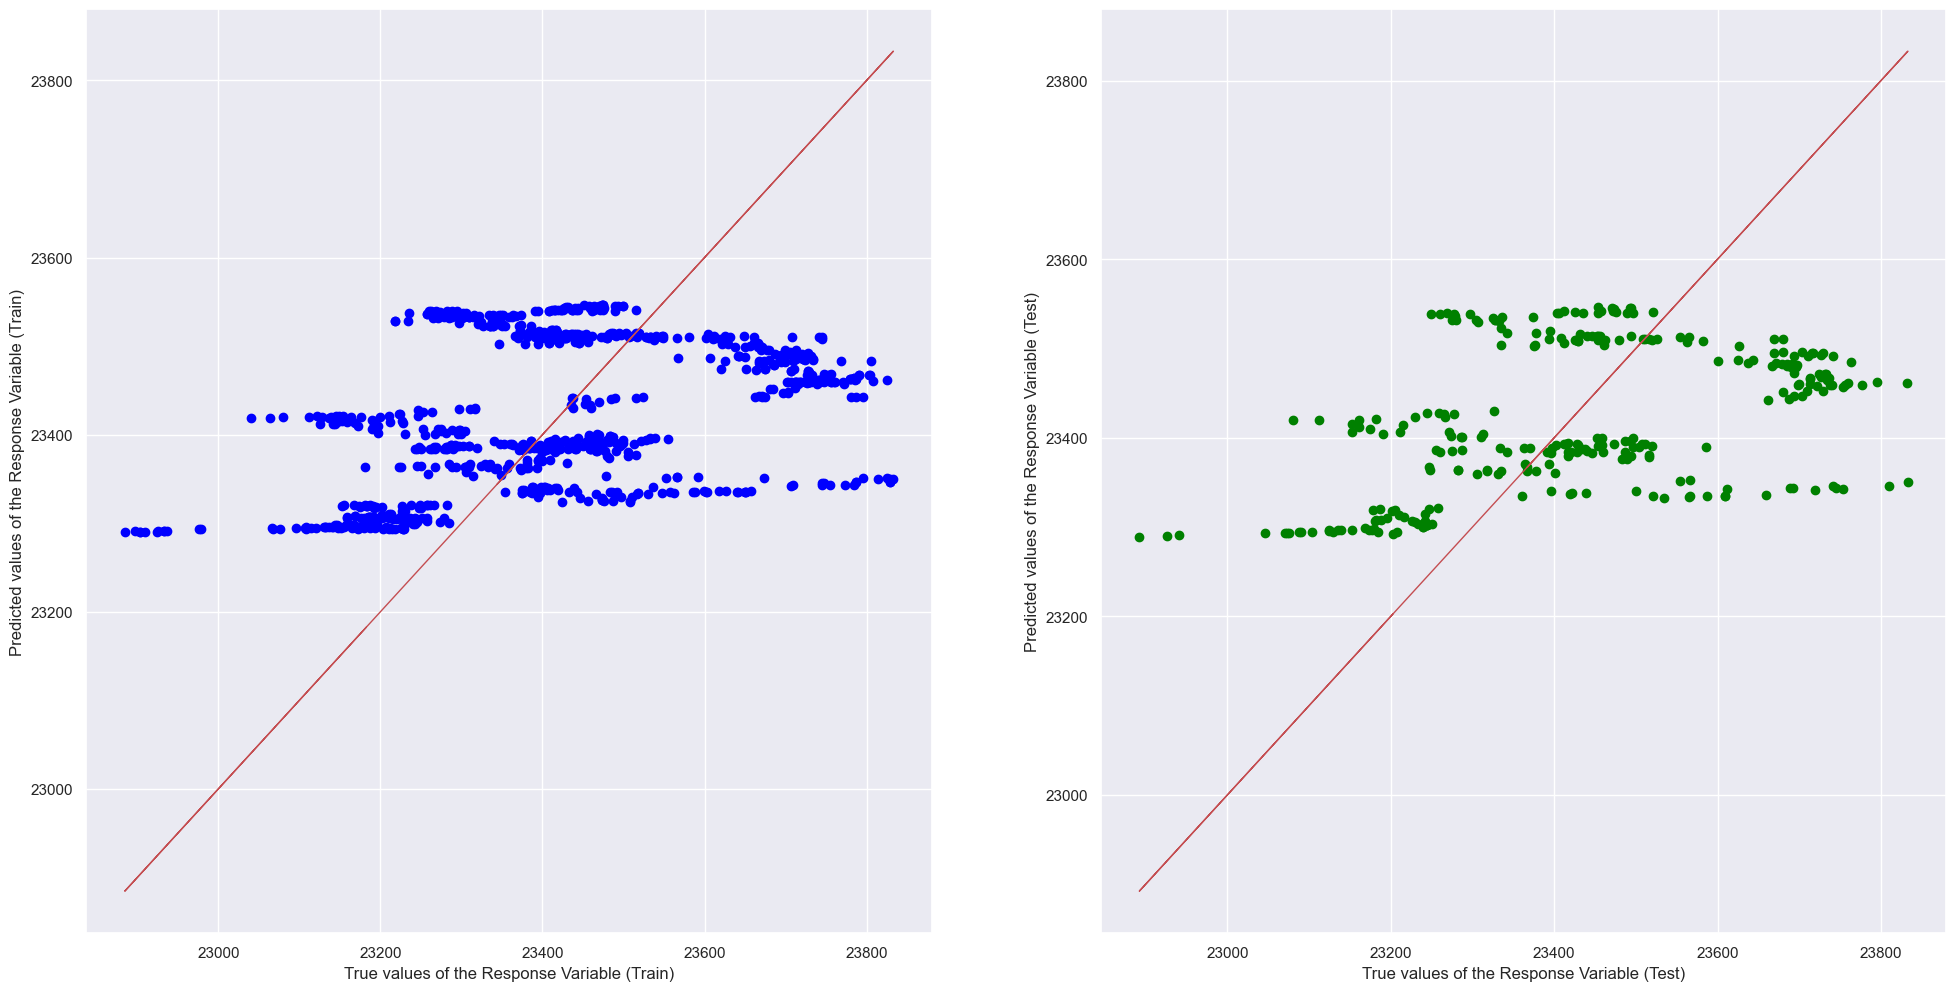

In [47]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

cum_inf =pd.DataFrame(tweets['cumulative_influence'])
price = pd.DataFrame(tweets['bitcoin_price'])


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(cum_inf, price, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()